# Predicting Earthquakes From Real-time Seismic Data


The goal of this project is to predict time remaining before lab earthquakes occur using real-time seismic data provided by Los Alamos National Laboratory (data source: https://www.kaggle.com/c/LANL-Earthquake-Prediction). We will use a 1GB subset of the *train.csv* file (the original file contains more than 700 million rows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('s3n://msds697-project/small_train.csv', dtype={'acoustic_data': np.float32, 'time_to_failure': np.float32})

Let's look at our data. There are only two columns: *acoustic_data*, which is the seismic signal [float64], and *time_to_failure* which is the time (in seconds) until the next laboratory earthquake [float64]

In [4]:
train.head()

,acoustic_data,time_to_failure
0,12.0,1.4691
1,6.0,1.4691
2,8.0,1.4691
3,5.0,1.4691
4,8.0,1.4691


The data consists of around 70 million rows.

In [5]:
train.shape

(69999999, 2)

Let's look at the seismic trends using 5% of our data. Based on the graph below, we observe two earthquakes (time to failure = 0) which are preceded by peaks in acoustic data. 

Text(0,0.5,'Time to Failure')

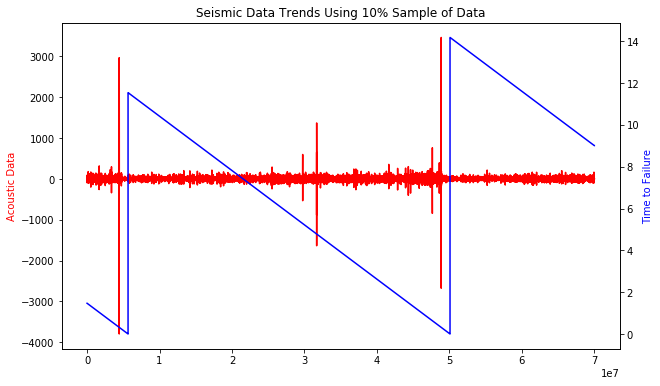

In [11]:
subset = train[::10]

figure, ax = plt.subplots(figsize=(10,6))

plt.title("Seismic Data Trends Using 10% Sample of Data")

plt.plot(subset['acoustic_data'], color='r')
ax.set_ylabel('Acoustic Data', color='r')

ax2 = ax.twinx()

plt.plot(subset['time_to_failure'], color='b')
ax2.set_ylabel('Time to Failure', color='b')
